# Homework 5 (100 Points)

## Exercise 1 (55 pts)

For this exercise we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [72]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
# import plotly.express as px
%matplotlib inline

### Part 1: Data pre-processing (7 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`. Take care of any missing values appropriately. [2pts]

In [73]:
bikes = pd.read_csv('/Users/mzhen/Downloads/homework-5-melzhen/citibike.csv')
bikes.ffill(axis = 0)
bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True


b) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays [2pt]

In [74]:
bikes_weekdays = bikes[bikes['weekday'] == True]
bikes_weekends = bikes[bikes['weekday'] == False]

bikes_weekdays.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,False,329,True,True
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,False,329,True,True
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,False,329,True,True
5,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,summer,8,False,329,True,True
6,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,summer,8,False,329,True,True


In [75]:
bikes_weekends.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,False,329,False,False
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,False,329,False,False
9,37201,0.000000,0.0,0.0,82.94,69.98,4.92126,2013,summer,8,False,329,False,False
10,33060,0.000000,0.0,0.0,80.96,64.94,2.46063,2013,summer,8,False,329,False,False
16,37285,0.000000,0.0,0.0,84.02,64.04,2.01324,2013,summer,8,False,329,False,False


c) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [3pts]

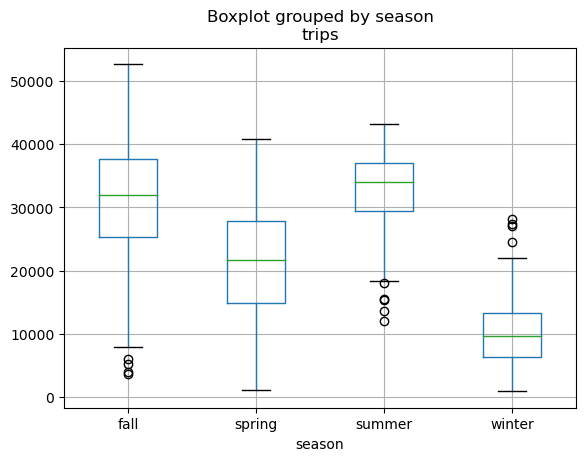

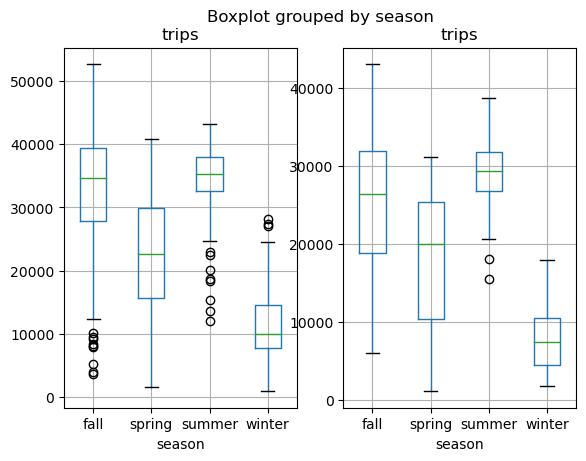

In [76]:
bikes.boxplot(column = 'trips', by = 'season')

fig, axes = plt.subplots(1, 2)

bikes_weekdays.boxplot(column='trips', by='season', ax=axes[0]) # add boxplot to 1st subplot
bikes_weekends.boxplot(column='trips', by='season', ax=axes[1]) # add boxplot to 2nd subplot

plt.show()

There is a difference in the distribution of trips between seasons. There are considerably less trips taken in Winter compared to the other seasons. The pattern in the distribution of trips between seasons is generally the same for both weekends and weekdays. The seasons in order from the most amount of trips to the least amount is: summer, fall, spring, and winter.

### Part 2: Qualitative predictors (10 pts)

The Season variable is an example of what’s called a categorical predictor. In this part you will fit a model with a qualitative predictor and interpret the findings.

a) Using the weekdays dataset, fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. [2pt]


In [77]:
import statsmodels.formula.api as smf

In [78]:
df = bikes_weekdays[['season', 'trips']].copy()
model = smf.ols(formula='trips ~ C(season)', data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     261.4
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.07e-108
Time:                        22:37:31   Log-Likelihood:                -6333.7
No. Observations:                 608   AIC:                         1.268e+04
Df Residuals:                     604   BIC:                         1.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.353e+04    

b) How many total coefficients are there in the model? What does each coefficient correspond to? [1pt]

There are 3 coefficients in the model. Each coefficient corresponds to the change in number of trips taken (dependent variable). 

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [2pt]

The coefficients for Spring and Winter are negative which means that they have an inverse relationship with the number of trips. When it is Spring or Winter, the number of trips goes down. We can see this in our boxplot which we plotted earlier. Spring and Winter are the seasons with less amount of trips compared to Fall and Summer. 

d) Repeat a) -> c) with your weekends dataset. What difference can you see? [5pt]

In [79]:
df = bikes_weekends[['season', 'trips']].copy()
model = smf.ols(formula='trips ~ C(season)', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.60e-43
Time:                        22:37:37   Log-Likelihood:                -2499.5
No. Observations:                 244   AIC:                             5007.
Df Residuals:                     240   BIC:                             5021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.577e+04    

I noticed that the coefficient for Spring has a larger negative value on weekends than on weekdays. This means that during the Spring, there is a greater negative correlation for trips taken on the weekends than weekdays.

### Part 3: Multiple linear regression (10 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [2pt]


In [80]:
model = smf.ols(formula='trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + C(month)', data=bikes_weekdays).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     167.6
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          2.49e-207
Time:                        22:37:50   Log-Likelihood:                -6066.4
No. Observations:                 608   AIC:                         1.217e+04
Df Residuals:                     591   BIC:                         1.224e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -240.0502   1272.748     

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [2pt]

There is a negative correlation between the number of trips and the following coefficients: snow_depth, snowfall, min_temperature, and precipitation. In comparison, there is a positive correlation for the number of trips between precipitaion and month.

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [2pt]

In [81]:
model = smf.ols(formula='trips ~ snow_depth + snowfall + min_temperature + max_temperature + precipitation + C(month) + average_wind_speed', data=bikes_weekdays).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     160.1
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          5.87e-208
Time:                        22:37:55   Log-Likelihood:                -6062.2
No. Observations:                 608   AIC:                         1.216e+04
Df Residuals:                     590   BIC:                         1.224e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2906.0082   1677

I chose to add the average wind speed as a feature because I believe it could affect the number of trips people take. The R-Squared of the Model did end up improving by a little bit.

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

Increased ridership: month, max_temperature

Decreased ridership: snow_depth, snowfall, min_temperature, precipitation, average_wind_speed.

e) Which predictors are statistically significant (95% confidence level)? [2pt]

snow_depth, max_temperature, precipitation, average_wind_speed, month(some of them)

### Part 4: Dealing with collinearity (8 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. (Lab 7 may help you here) [2pt]


In [82]:
df = bikes_weekdays[['trips', 'snow_depth', 'snowfall', 'min_temperature', 'max_temperature', 'precipitation', 'month']].copy()

df.corr()

,trips,snow_depth,snowfall,min_temperature,max_temperature,precipitation,month
trips,1.000000,-0.497661,-0.289367,0.794193,0.813664,-0.265716,0.448835
snow_depth,-0.497661,1.000000,0.261811,-0.493187,-0.475653,0.022949,-0.439442
snowfall,-0.289367,0.261811,1.000000,-0.237841,-0.232368,0.237246,-0.215126
min_temperature,0.794193,-0.493187,-0.237841,1.000000,0.968400,0.013444,0.381236
max_temperature,0.813664,-0.475653,-0.232368,0.968400,1.000000,-0.011895,0.329866
precipitation,-0.265716,0.022949,0.237246,0.013444,-0.011895,1.000000,0.003059
month,0.448835,-0.439442,-0.215126,0.381236,0.329866,0.003059,1.000000


b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

min_temperature and max_temperature are highly correlated with each other.

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [2pt]

In [83]:
model = smf.ols(formula='trips ~ snow_depth + snowfall + max_temperature + precipitation + C(month) + average_wind_speed', data=bikes_weekdays).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     170.1
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          6.78e-209
Time:                        22:38:04   Log-Likelihood:                -6062.7
No. Observations:                 608   AIC:                         1.216e+04
Df Residuals:                     591   BIC:                         1.223e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3058.5065   1669

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [2pt]

The coefficient for max_temperature is now 320.9967, which is considerably less than previously estimated which was 356.9616. 
max_temperature is statistically significant.

### Part 5: Exploring different models (20 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [2pts]

<AxesSubplot:xlabel='month', ylabel='trips'>

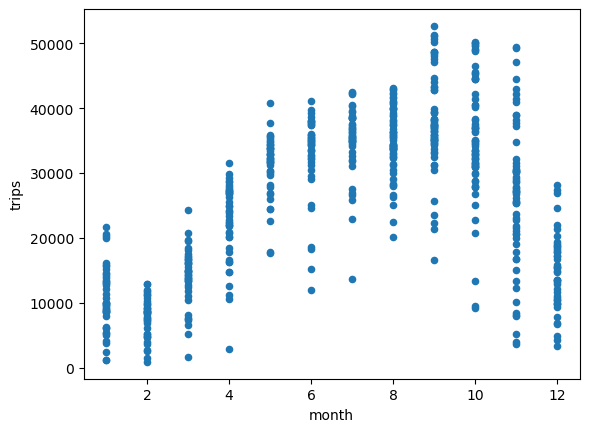

In [84]:
bikes_weekdays.plot.scatter('month', 'trips')

I see a downward curve in the scatterplot. Hence, a linear relationship does not seem like a good way of modeling how bikeshare count varies with month.

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [4pts]

1 degree:  0.20013513947687978
2 degrees:  0.5946086788659191
3 degrees:  0.6690926303981859


<AxesSubplot:xlabel='month', ylabel='trips'>

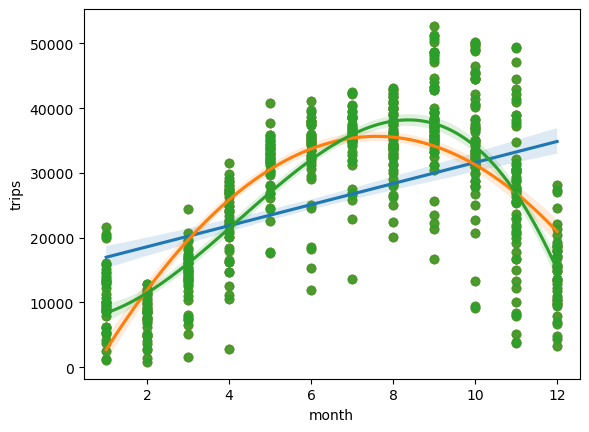

In [93]:
df = bikes_weekdays[['month', 'trips']].copy()

model1 = smf.ols(formula='trips ~ month', data=df).fit()
model2 = smf.ols(formula='trips ~ month + np.power(month, 2)', data=df).fit()
model3 = smf.ols(formula='trips ~ month + np.power(month, 2) + np.power(month, 3)', data=df).fit()

fig = plt.figure()
print("1 degree: ", model1.rsquared_adj)
print("2 degrees: ", model2.rsquared_adj)
print("3 degrees: ", model3.rsquared_adj)

sns.regplot(x='month', y='trips',data=df,order=1, label="1 degree")
sns.regplot(x='month', y='trips',data=df,order=2, label="2 degrees")
sns.regplot(x='month', y='trips',data=df,order=3, label="3 degrees")

The best degree for the polynomial is 3 because its R-squared is the largest.

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [7pts]


Relationship for max_temperature
1 degree:  0.6614921737781982
2 degrees:  0.6683217978418186
3 degrees:  0.6825013600987261


<AxesSubplot:xlabel='max_temperature', ylabel='trips'>

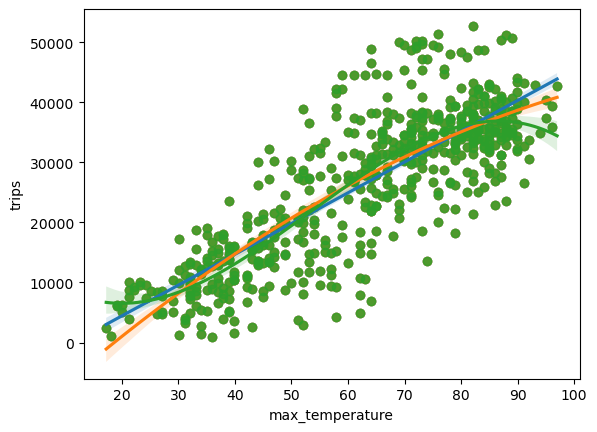

In [94]:
df = bikes_weekdays[['max_temperature', 'trips']].copy()

model1 = smf.ols(formula='trips ~ max_temperature', data=df).fit()
model2 = smf.ols(formula='trips ~ max_temperature + np.power(max_temperature, 2)', data=df).fit()
model3 = smf.ols(formula='trips ~ max_temperature + np.power(max_temperature, 2) + np.power(max_temperature, 3)', data=df).fit()

fig = plt.figure()
print("Relationship for max_temperature")
print("1 degree: ", model1.rsquared_adj)
print("2 degrees: ", model2.rsquared_adj)
print("3 degrees: ", model3.rsquared_adj)

sns.regplot(x='max_temperature', y='trips',data=df,order=1, label="1 degree")
sns.regplot(x='max_temperature', y='trips',data=df,order=2, label="2 degrees")
sns.regplot(x='max_temperature', y='trips',data=df,order=3, label="3 degrees")

Relationship for snow_depth
1 degree:  0.24642548628834948
2 degrees:  0.2807067452350903
3 degrees:  0.28941837920917113


<AxesSubplot:xlabel='snow_depth', ylabel='trips'>

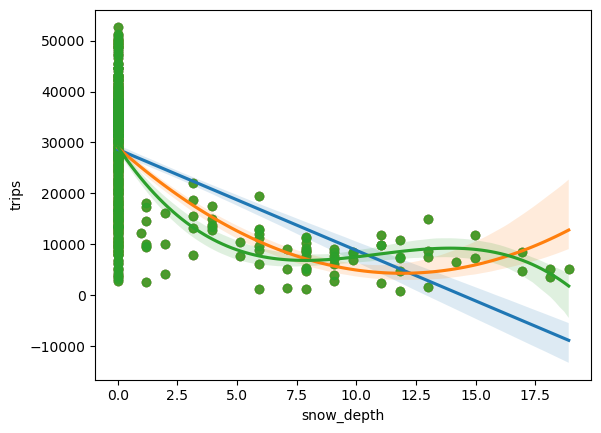

In [95]:
df = bikes_weekdays[['snow_depth', 'trips']].copy()

model1 = smf.ols(formula='trips ~ snow_depth', data=df).fit()
model2 = smf.ols(formula='trips ~ snow_depth + np.power(snow_depth, 2)', data=df).fit()
model3 = smf.ols(formula='trips ~ snow_depth + np.power(snow_depth, 2) + np.power(snow_depth, 3)', data=df).fit()

fig = plt.figure()
print("Relationship for snow_depth")
print("1 degree: ", model1.rsquared_adj)
print("2 degrees: ", model2.rsquared_adj)
print("3 degrees: ", model3.rsquared_adj)

sns.regplot(x='snow_depth', y='trips',data=df,order=1, label="1 degree")
sns.regplot(x='snow_depth', y='trips',data=df,order=2, label="2 degrees")
sns.regplot(x='snow_depth', y='trips',data=df,order=3, label="3 degrees")

Relationship for precipitation
1 degree:  0.06907142919128928
2 degrees:  0.07873945219431278
3 degrees:  0.09359511887808081


<AxesSubplot:xlabel='precipitation', ylabel='trips'>

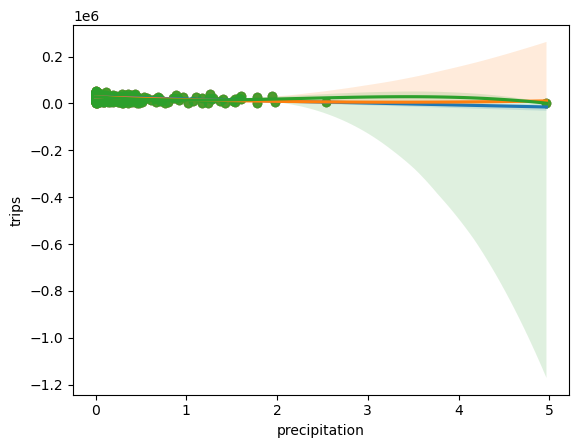

In [96]:
df = bikes_weekdays[['precipitation', 'trips']].copy()

model1 = smf.ols(formula='trips ~ precipitation', data=df).fit()
model2 = smf.ols(formula='trips ~ precipitation + np.power(precipitation, 2)', data=df).fit()
model3 = smf.ols(formula='trips ~ precipitation + np.power(precipitation, 2) + np.power(precipitation, 3)', data=df).fit()

fig = plt.figure()
print("Relationship for precipitation")
print("1 degree: ", model1.rsquared_adj)
print("2 degrees: ", model2.rsquared_adj)
print("3 degrees: ", model3.rsquared_adj)

sns.regplot(x='precipitation', y='trips',data=df,order=1, label="1 degree")
sns.regplot(x='precipitation', y='trips',data=df,order=2, label="2 degrees")
sns.regplot(x='precipitation', y='trips',data=df,order=3, label="3 degrees")

The best degree for the polynomial for all of the other inputs (max_temperature, snow_fall, and precipitation) is 3 because its R-squared is the largest.

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [7pts]

Relationship for max_temperature
1 degree:  0.6984171092843715
2 degrees:  0.7084052047463556
3 degrees:  0.7273472956582256


<AxesSubplot:xlabel='max_temperature', ylabel='trips'>

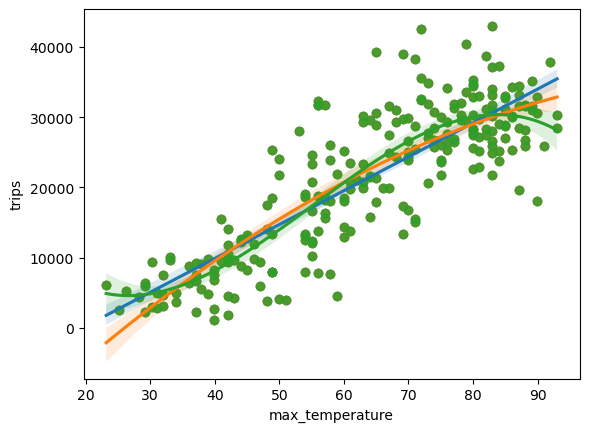

In [97]:
df = bikes_weekends[['max_temperature', 'trips']].copy()

model1 = smf.ols(formula='trips ~ max_temperature', data=df).fit()
model2 = smf.ols(formula='trips ~ max_temperature + np.power(max_temperature, 2)', data=df).fit()
model3 = smf.ols(formula='trips ~ max_temperature + np.power(max_temperature, 2) + np.power(max_temperature, 3)', data=df).fit()

fig = plt.figure()
print("Relationship for max_temperature")
print("1 degree: ", model1.rsquared_adj)
print("2 degrees: ", model2.rsquared_adj)
print("3 degrees: ", model3.rsquared_adj)

sns.regplot(x='max_temperature', y='trips',data=df,order=1, label="1 degree")
sns.regplot(x='max_temperature', y='trips',data=df,order=2, label="2 degrees")
sns.regplot(x='max_temperature', y='trips',data=df,order=3, label="3 degrees")

Relationship for snow_depth
1 degree:  0.2340962009835693
2 degrees:  0.28770865092503695
3 degrees:  0.3110734710738916


<AxesSubplot:xlabel='snow_depth', ylabel='trips'>

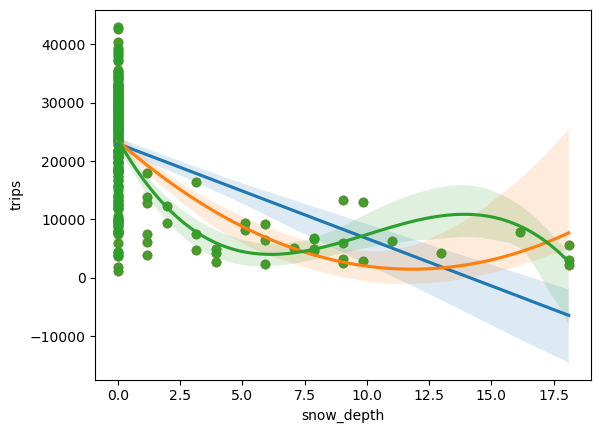

In [98]:
df = bikes_weekends[['snow_depth', 'trips']].copy()

model1 = smf.ols(formula='trips ~ snow_depth', data=df).fit()
model2 = smf.ols(formula='trips ~ snow_depth + np.power(snow_depth, 2)', data=df).fit()
model3 = smf.ols(formula='trips ~ snow_depth + np.power(snow_depth, 2) + np.power(snow_depth, 3)', data=df).fit()

fig = plt.figure()
print("Relationship for snow_depth")
print("1 degree: ", model1.rsquared_adj)
print("2 degrees: ", model2.rsquared_adj)
print("3 degrees: ", model3.rsquared_adj)

sns.regplot(x='snow_depth', y='trips',data=df,order=1, label="1 degree")
sns.regplot(x='snow_depth', y='trips',data=df,order=2, label="2 degrees")
sns.regplot(x='snow_depth', y='trips',data=df,order=3, label="3 degrees")

Relationship for precipitation
1 degree:  0.0934441292641347
2 degrees:  0.09492968967119408
3 degrees:  0.09498568670713681


<AxesSubplot:xlabel='precipitation', ylabel='trips'>

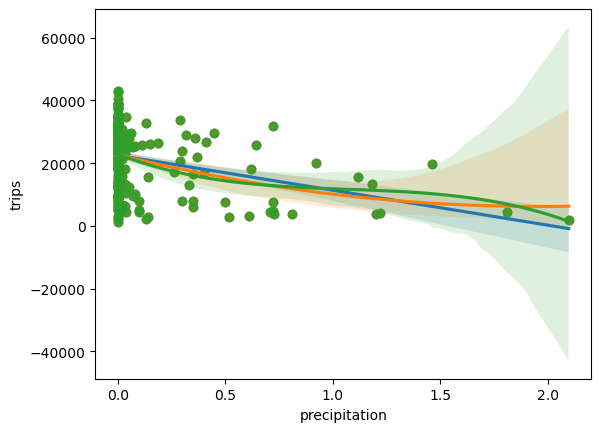

In [99]:
df = bikes_weekends[['precipitation', 'trips']].copy()

model1 = smf.ols(formula='trips ~ precipitation', data=df).fit()
model2 = smf.ols(formula='trips ~ precipitation + np.power(precipitation, 2)', data=df).fit()
model3 = smf.ols(formula='trips ~ precipitation + np.power(precipitation, 2) + np.power(precipitation, 3)', data=df).fit()

fig = plt.figure()
print("Relationship for precipitation")
print("1 degree: ", model1.rsquared_adj)
print("2 degrees: ", model2.rsquared_adj)
print("3 degrees: ", model3.rsquared_adj)

sns.regplot(x='precipitation', y='trips',data=df,order=1, label="1 degree")
sns.regplot(x='precipitation', y='trips',data=df,order=2, label="2 degrees")
sns.regplot(x='precipitation', y='trips',data=df,order=3, label="3 degrees")

The best degree for the polynomial for all of the other inputs (max_temperature, snow_fall, and precipitation) in the weekends dataset is still 3 because its R-squared is the largest.

## Exercise 2 (45pts)

In this exercise we will implement a Natural Language Processing (NLP) system using binary logistic regression.

The data you will be working with comes from the [Yelp Dataset](https://www.yelp.com/dataset). Each line is a review that consists of a label (0 for negative reviews and 1 for positive reviews) and a set of words.

```
1 i will never forget this single breakfast experience in mad...
0 the search for decent chinese takeout in madison continues ...
0 sorry but me julio fell way below the standard even for med...
1 so this is the kind of food that will kill you so there s t...
```

In order to transform the set of words into vectors, we will rely on a method of feature engineering called word embeddings. Rather than simply indicating which words are present, word embeddings represent each word by "embedding" it in a low-dimensional vector space which may carry more information about the semantic meaning of the word. (for example in this space, the words "King" and "Queen" would be close).

`word2vec.txt` contains the `word2vec` embeddings for about 15 thousand words. Not every word in each review is present in the provided `word2vec.txt` file. We can treat these words as being "out of vocabulary" and ignore them.

### Example

Let x_i denote the sentence `“a hot dog is not a sandwich because it is not square”` and let a toy word2vec dictionary be as follows:

```
hot      0.1     0.2     0.3
not      -0.1    0.2     -0.3
sandwich 0.0     -0.2    0.4
square   0.2     -0.1    0.5
```

we would first `trim` the sentence to only contain words in our vocabulary: `"hot not sandwich not square”` then embed x_i into the feature space:

$$ φ2(x_i)) = \frac{1}{5} (word2vec(\text{hot}) + 2 · word2vec(\text{not}) + word2vec(\text{sandwich}) + word2vec(\text{square})) = \left[0.02 \hspace{2mm} 0.06 \hspace{2mm} 0.12 \hspace{2mm}\right]^T $$

### Part 1 (20pts)

a) Implement a function to trim out-of-vocabulary words from the reviews. Your function should return an nd array of the same dimension and dtype as the original loaded dataset. (10pts)

In [65]:
import csv
import numpy as np
from nltk import word_tokenize

VECTOR_LEN = 300   # Length of word2vec vector
MAX_WORD_LEN = 64  # Max word length in dict.txt and word2vec.txt

################################################################################
# We have provided you the functions for loading the tsv and txt files. Feel   #
# free to use them! No need to change them at all.                             #
################################################################################


def load_tsv_dataset(file):
    """
    Loads raw data and returns a tuple containing the reviews and their ratings.

    Parameters:
        file (str): File path to the dataset tsv file.

    Returns:
        An np.ndarray of shape N. N is the number of data points in the tsv file.
        Each element dataset[i] is a tuple (label, review), where the label is
        an integer (0 or 1) and the review is a string.
    """
    dataset = np.loadtxt(file, delimiter='\t', comments=None, encoding='utf-8',
                         dtype='l,O')
    return dataset


def load_feature_dictionary(file):
    """
    Creates a map of words to vectors using the file that has the word2vec
    embeddings.

    Parameters:
        file (str): File path to the word2vec embedding file.

    Returns:
        A dictionary indexed by words, returning the corresponding word2vec
        embedding np.ndarray.
    """
    word2vec_map = dict()
    with open(file) as f:
        read_file = csv.reader(f, delimiter='\t')
        for row in read_file:
            word, embedding = row[0], row[1:]
            word2vec_map[word] = np.array(embedding, dtype=float)
    return word2vec_map


def trim_reviews(path_to_dataset):
    def trim(words_dict, words):
        trimmed = [word for word in words if word in words_dict.keys()]
        return trimmed

    trimmed_reviews = []
    reviews = [x[1] for x in load_tsv_dataset(path_to_dataset)]
    labels = [x[0] for x in load_tsv_dataset(path_to_dataset)]
    words = [word_tokenize(sub) for sub in reviews]

    for word in words:
        trimmed_reviews.append(trim(load_feature_dictionary("./data/word2vec.txt"), word))

    res_list = [' '.join(x) for x in trimmed_reviews]
    
    list_of_trimmed_reviews = list(zip(labels, res_list))
    arr = np.array(list_of_trimmed_reviews, dtype='l,O')

    return arr
    

trim_train = trim_reviews("./data/train_small.tsv")
trim_test = trim_reviews("./data/test_small.tsv")

In [5]:
# print(trim_test)

In [66]:
# print(trim_test)
print(type(trim_train))
print(trim_train.size)
print(trim_train.dtype)

<class 'numpy.ndarray'>
20
[('f0', '<i8'), ('f1', 'O')]


In [67]:
# load_tsv_dataset("./data/test_small.tsv")
print(type(load_tsv_dataset("./data/train_small.tsv")))
print(load_tsv_dataset("./data/train_small.tsv").size)
print(load_tsv_dataset("./data/train_small.tsv").dtype)

<class 'numpy.ndarray'>
20
[('f0', '<i8'), ('f1', 'O')]


b) Implement the embedding and store it to a `.tsv` file where the first column is the label and the rest are the features from the embedding. Round all numbers to 6 decimal places. `embedded_train_small.tsv` and `embedded_test_small.tsv` contain the expected output of your function. (10pts)

In [68]:
res_list = [x[0] for x in trim_train]
floats = [float(x) for x in res_list]
print(floats)

[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]


In [69]:
def embed_reviews(trimmed_dataset):
    def findMeanVector(words_dict, words):
        # remove out-of-vocabulary words\n",
        words = [words_dict[word] for word in words if word in words_dict.keys()]
        if len(words) >= 1:
            meanvector = np.round(np.mean(words, axis=0), 6).tolist()
            formatted_meanvector = ['{:.6f}'.format(float(elem)) for elem in meanvector]
            return formatted_meanvector
        else:
            meanvector = np.round(np.zeros((100,)), 6).tolist()
            formatted_meanvector = ['{:.6f}'.format(float(elem)) for elem in meanvector]
            return formatted_meanvector

    embedded = []
    reviews = [x[1] for x in trimmed_dataset]
    labels = [x[0] for x in trimmed_dataset]
    floats_l = ['{:.6f}'.format(float(elem)) for elem in labels]
    floats_labels = [[x] for x in floats_l]

    # rev is the list of tokenized reviews
    rev = [word_tokenize(sub) for sub in reviews]

    for review in rev:
        embedded.append(findMeanVector(load_feature_dictionary("./data/word2vec.txt"), review))
        embed_reviews = list(map(list.__add__, floats_labels, embedded))

    return embed_reviews


def save_as_tsv(dataset, filename):
    with open(filename, 'w+') as f:
        writer = csv.writer(f, delimiter='\t')
        writer.writerows(dataset)
    return

embedded_train = embed_reviews(trim_train)
embedded_test = embed_reviews(trim_test)

save_as_tsv(embedded_train, "./data/output/embedded_train_small.tsv")
save_as_tsv(embedded_test, "./data/output/embedded_test_small.tsv")

In [12]:
# print(embedded_train)

### Part 2 (25pts)

In this part we'll be implementing Stochastic Gradient Descent for binary Logistic Regression Classifier.

Some rules:

1. Include an intercept term in your model. You must consider the bias term as part of the weight vector and not a separate term to keep track of.
2. Initialize all model parameters to 0
3. Use vector and matrix multiplication
4. Do not shuffle the data

The expected `metrics.txt` from the dataset with `500` epochs and `0.001` learning rate is:

```
error(train): 0.000000
error(test): 0.625000
```

We will be testing your code on other, larger datasets.

In [100]:
import numpy as np

def load_tsv_dataset(file):
    return np.loadtxt(file, delimiter='\t', encoding='utf-8')


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)


def sgd(theta, X, Y, learning_rate):
    # TODO: implement in vector form
    for i in range(X.shape[0]):
        x = X[i].reshape(1, X.shape[1])
        y = Y[i].reshape(1,1)
        z = x.T @ (sigmoid(x @ theta) - y)
        theta = theta - learning_rate * z
    return theta


def train(theta, X, y, num_epoch, learning_rate):
    for _ in range(num_epoch):
        theta = sgd(theta, X, y, learning_rate)
    return theta


def predict(theta, X):
    # TODO: implement in vector form
    pred = []
    y_pred = sigmoid(X @ theta)

    for i in y_pred:
        if i >= 0.5:
            pred.append(1)
        else:
            pred.append(0)
    return np.array(pred)
    

def compute_error(y_pred, y):
    # TODO: implement in vector form
    error = 0
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            error += 1
    return error / len(y)


def write_metrics(train_err, test_err, metrics_out):
    with open(metrics_out, 'w+') as f:
        w = "error(train): " + "{:.6f}".format(train_err) + "\n"
        w += "error(test): " + "{:.6f}".format(test_err) + "\n"
        f.write(w)
    return


def logistic_reg(formatted_train, formatted_test, metrics_out, num_epochs, learning_rate):
    train_loaded = load_tsv_dataset(formatted_train)
    y = np.array([item[0] for item in train_loaded])
    X = np.array([item[1:] for item in train_loaded])

    theta = np.zeros((X[0].size, 1))

    learned_theta = train(theta, X, y, num_epochs, learning_rate)
    train_pred = predict(learned_theta, X)
    train_err = compute_error(train_pred, y)

    test_loaded = load_tsv_dataset(formatted_test)
    X_test = np.array([item[1:] for item in test_loaded])
    y_test = np.array([item[0] for item in test_loaded])

    test_pred = predict(learned_theta, X_test)
    test_err = compute_error(test_pred, y_test)

    write_metrics(train_err, test_err, metrics_out)
    return


logistic_reg("./data/output/embedded_train_small.tsv", "./data/output/embedded_test_small.tsv", "./data/output/metrics.txt", 500, 0.001)